# 1. Data Wrangling:

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
df = pd.read_excel("Data.xlsx")

In [48]:
df.head(5)

,Business ID,Application ID,Application Date,Customer Type,Application Channel,Amount Requested,Industry,Census Region,Business Legal Structure,Age of Business(Months),Personal CreditScore,Annual Revenue,Device,Self Directed,Self Submit
0,977075,1242384,2019-08-08,Returning,SEO,465000,Accommodation and Food Services,West,Corporation,72,741.0,1800000,computer,No,No
1,979213,1240973,2019-07-29,Returning,Referral,1000000,Wholesale Trade,Midwest,Limited Liability Company,136,712.0,1950000,unspecified,No,No
2,979213,1241590,2019-08-02,Returning,Referral,1000000,Wholesale Trade,Midwest,Limited Liability Company,144,688.0,1950000,computer,No,No
3,979213,1241996,2019-08-06,Returning,Referral,1000000,Wholesale Trade,Midwest,Limited Liability Company,144,682.0,1950000,computer,No,No
4,979213,1241997,2019-08-06,Returning,Referral,1000000,Wholesale Trade,Midwest,Limited Liability Company,144,631.0,1950000,computer,No,No


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41572 entries, 0 to 41571
Data columns (total 15 columns):
Business ID                 41572 non-null int64
Application ID              41572 non-null int64
Application Date            41572 non-null datetime64[ns]
Customer Type               41572 non-null object
Application Channel         41572 non-null object
Amount Requested            41572 non-null int64
Industry                    41551 non-null object
Census Region               41572 non-null object
Business Legal Structure    41572 non-null object
Age of Business(Months)     41572 non-null int64
Personal CreditScore        41567 non-null float64
Annual Revenue              41572 non-null int64
Device                      41572 non-null object
Self Directed               41572 non-null object
Self Submit                 41572 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(8)
memory usage: 4.8+ MB


## 1.1. Null value

In [50]:
#Industry:
# It's a categorical variables, so replace the null value with a categorical variables "Unkown"
df["Industry"] = df["Industry"].fillna("Unknown")

In [51]:
#Personal CreditScore:
#Personal CreditScore has null value both "NaN" and "0"(on codebook)
pc_mean = df["Personal CreditScore"].mean()
df["Personal CreditScore"]= df["Personal CreditScore"].fillna(pc_mean)
df["Personal CreditScore"] = df["Personal CreditScore"].replace(0,pc_mean)

In [52]:
#Annual Revenue:
ar_mean = df["Annual Revenue"].mean()
df["Annual Revenue"]= df["Annual Revenue"].replace(0,ar_mean)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41572 entries, 0 to 41571
Data columns (total 15 columns):
Business ID                 41572 non-null int64
Application ID              41572 non-null int64
Application Date            41572 non-null datetime64[ns]
Customer Type               41572 non-null object
Application Channel         41572 non-null object
Amount Requested            41572 non-null int64
Industry                    41572 non-null object
Census Region               41572 non-null object
Business Legal Structure    41572 non-null object
Age of Business(Months)     41572 non-null int64
Personal CreditScore        41572 non-null float64
Annual Revenue              41572 non-null float64
Device                      41572 non-null object
Self Directed               41572 non-null object
Self Submit                 41572 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(8)
memory usage: 4.8+ MB


## 1.2. Outlier

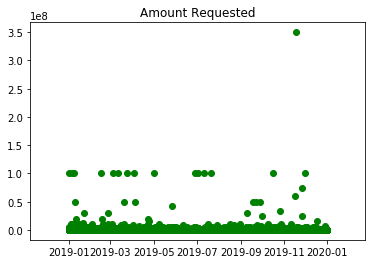

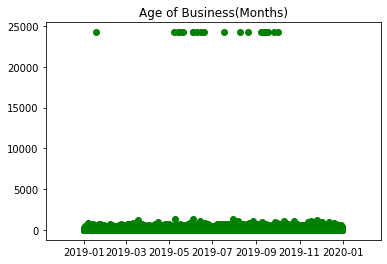

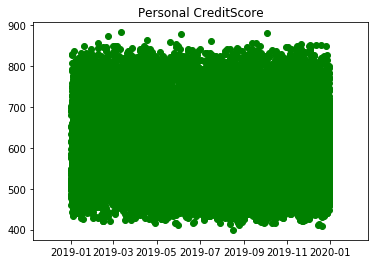

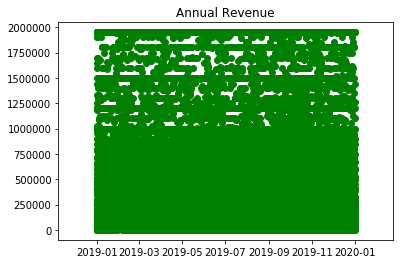

In [54]:
skip = 0 #Control Flow
#Utilize Scatter plot to 
for i in df: 
    if skip >2: #Skip BusinessID,App ID, and Date
        try:
            df[i]/1   # to see if it's numeric
            plt.title(i)
            plt.scatter(df["Application Date"], df[i],color = "green") 
            plt.show()
            plt.close()
        except: #Skip non-numeric data
            continue
    skip = skip+1
#1. "Amount Requested" has outliers. Requiring for 350,000,004 is impossible.
#2. "Age of Business(months) has outliers, the max number of age of business is 24,238 months, which is 2019 years.

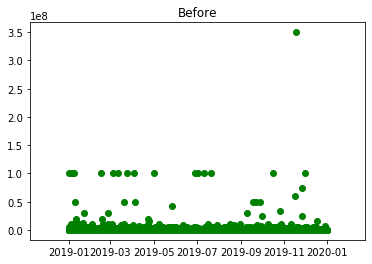

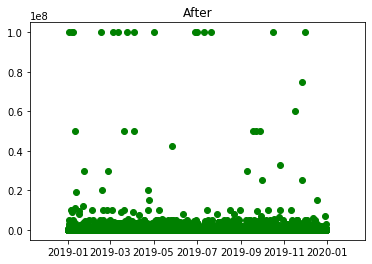

In [55]:
#1.Amount Requested:
plt.title("Before")
plt.scatter(df["Application Date"], df["Amount Requested"], color = "green")#Scatter plot before the outlier is dropped
plt.show()
plt.close()
otlr = 0
for i in df["Amount Requested"]:# Find the value of the outlier
    if i > 150000000: # In the diagram, we can easily find out the outlier is larger than 1.5e8
        otlr = i
        df.drop(df[df["Amount Requested"]==otlr].index.values, axis= 0, inplace=True) # Drop the rows

plt.title("After")
plt.scatter(df["Application Date"], df["Amount Requested"], color = "green")
plt.show()
plt.close()#Scatter plot after dropping the outlier

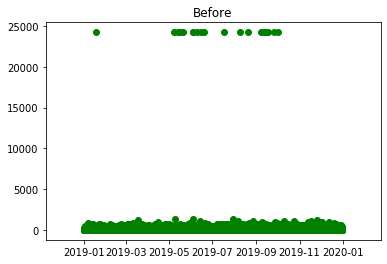

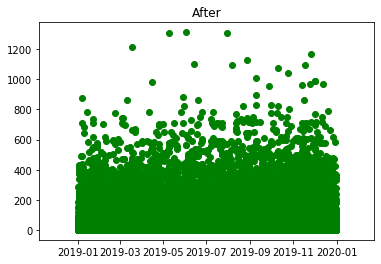

In [56]:
#2. Age of Business(Months)
plt.title("Before")
plt.scatter(df["Application Date"], df["Age of Business(Months)"],color = "green")#Scatter plot before the outlier is dropped
plt.show()
plt.close()
otlr = 0
for i in df["Age of Business(Months)"]:# Find the value of the outlier
    if i > 15000: # In the diagram, we can easily find out the outlier is larger than 15,000 months
        otlr = i
        df.drop(df[df["Age of Business(Months)"]==otlr].index.values, axis= 0, inplace=True) # Drop the rows
plt.title("After")
plt.scatter(df["Application Date"], df["Age of Business(Months)"],color = "green")
plt.show()
plt.close()#Scatter plot after dropping the outlier

# 2. Business Analytics: Device usage

## 2.1. Which device contributed to the maximum number of applications in 12 months period?

In [57]:
dev_grp = df.groupby(df["Device"], as_index=False)["Application ID"].count()
dev_grp.sort_values(["Application ID"], ascending= False)

,Device,Application ID
2,phone,19235
0,computer,16591
4,unspecified,4850
3,tablet,727
1,mobileapp,149


## 2.2. How did the application distribution change over time?

In [58]:
df= df.sort_values("Application Date", ascending = True)
dum = pd.get_dummies(df)
device = dum.iloc[:,45:50]
device["Application Date"] = df["Application Date"]
gp = device.groupby(["Application Date"], as_index=False).sum()
device_date = gp.groupby(gp["Application Date"].dt.month).sum().reset_index()
device_date = pd.DataFrame(device_date)
device_date

,Application Date,Device_computer,Device_mobileapp,Device_phone,Device_tablet,Device_unspecified
0,1,1325.0,15.0,833.0,49.0,352.0
1,2,1037.0,11.0,566.0,46.0,314.0
2,3,1062.0,9.0,697.0,52.0,354.0
3,4,1275.0,16.0,1280.0,60.0,303.0
4,5,1315.0,2.0,1296.0,79.0,381.0
5,6,1412.0,5.0,1898.0,74.0,368.0
6,7,1288.0,9.0,1902.0,64.0,431.0
7,8,1568.0,6.0,2154.0,55.0,462.0
8,9,1524.0,14.0,2663.0,99.0,451.0
9,10,1628.0,19.0,2099.0,58.0,490.0


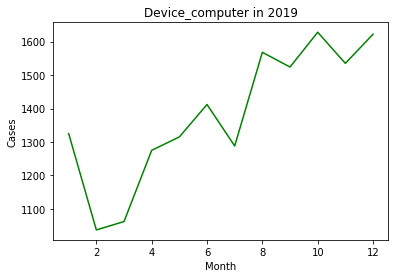

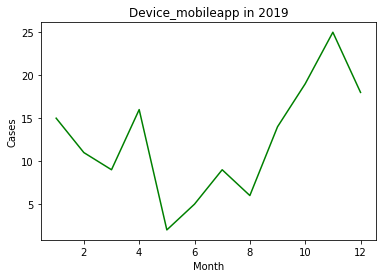

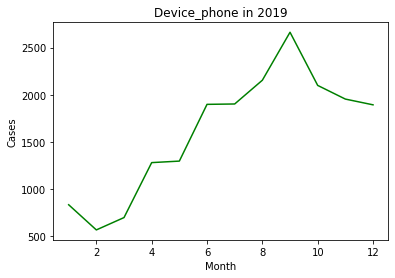

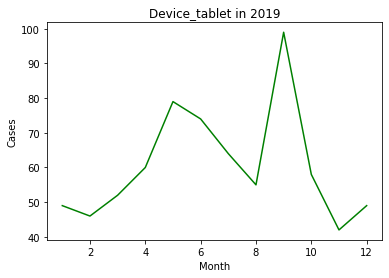

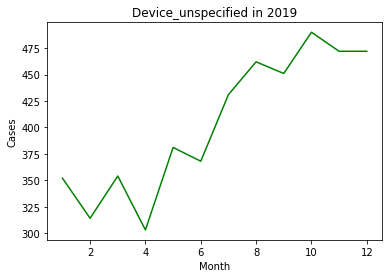

In [59]:
skip=0 #Control Flow
for i in device_date:
    if skip>0:
        plt.title(i+ " in 2019")
        plt.plot(device_date["Application Date"], device_date[i], color = "green")
        plt.xlabel("Month")
        plt.ylabel("Cases")
        plt.show()
        plt.close
    skip +=1

## 2.3. Did "application channel" have any impact on the trend of device usage?

In [60]:
dev_channel = dum.iloc[:,9:12]
dev_channel["Device"] = df["Device"]
dev_channel = dev_channel.groupby(["Device"], as_index=False).sum()
dev_channel = pd.DataFrame(dev_channel)
dev_channel

,Device,Application Channel_PPC,Application Channel_Referral,Application Channel_SEO
0,computer,10049.0,3700.0,2842.0
1,mobileapp,54.0,8.0,87.0
2,phone,16953.0,596.0,1686.0
3,tablet,639.0,20.0,68.0
4,unspecified,1342.0,2121.0,1387.0


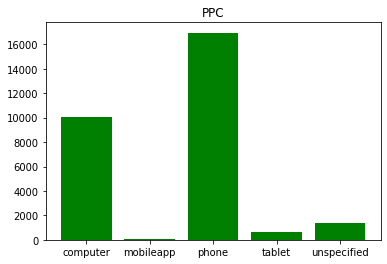

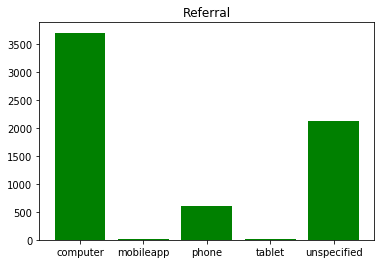

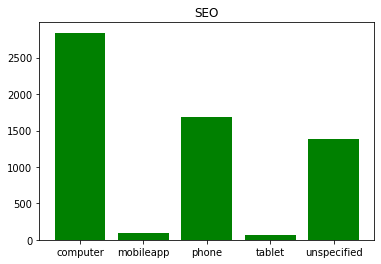

In [61]:
skip=0
for i in dev_channel:
        if skip>0:
            tt = i.replace("Application Channel_","")
            plt.title(tt)
            plt.bar(dev_channel["Device"], dev_channel[i], color ="green")
            plt.show()
            plt.close
        skip+=1

In [62]:
dev_channel = dum.iloc[:,9:12]
dev_channel["Application Date"] = df["Application Date"]
gp2 = dev_channel.groupby(["Application Date"], as_index=False).sum()
devc = gp2.groupby(gp2["Application Date"].dt.month).sum().reset_index()
devc = pd.DataFrame(devc)
devc

,Application Date,Application Channel_PPC,Application Channel_Referral,Application Channel_SEO
0,1,1645.0,540.0,389.0
1,2,1229.0,423.0,322.0
2,3,1422.0,440.0,312.0
3,4,2067.0,438.0,429.0
4,5,2158.0,499.0,416.0
5,6,2640.0,472.0,645.0
6,7,2672.0,514.0,508.0
7,8,3072.0,531.0,642.0
8,9,3542.0,625.0,584.0
9,10,2937.0,650.0,707.0


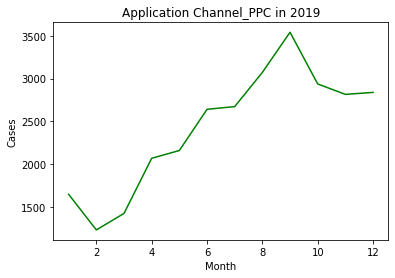

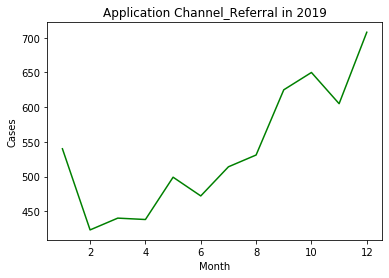

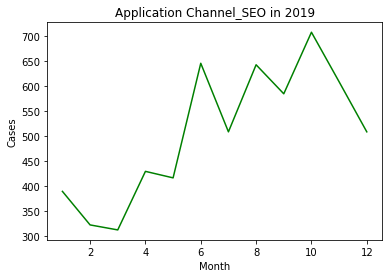

In [63]:
skip=0 #Control Flow
for i in devc:
    if skip>0:
        plt.title(i+ " in 2019")
        plt.plot(devc["Application Date"], devc[i],color="green")
        plt.xlabel("Month")
        plt.ylabel("Cases")
        plt.show()
        plt.close()
    skip +=1

## 2.4. Which Industry contributed most in 2019?

In [64]:
#Count of applications:
cnt=[]
cnt=pd.DataFrame(cnt)
ind = df.groupby(df["Industry"],as_index=False).count()
cnt["Industry"]=ind["Industry"]
cnt["num_Application"] = ind["Application ID"]
cnt.sort_values(["num_Application"], ascending= False)

,Industry,num_Application
11,Other Services (except Public Administration),7823
16,Retail Trade,6640
0,Accommodation and Food Services,5175
4,Construction,4505
17,Transportation and Warehousing,3248
3,"Arts, Entertainment, and Recreation",2232
7,Health Care and Social Assistance,2064
12,"Professional, Scientific, and Technical Services",1825
14,Real Estate and Rental and Leasing,1527
20,Wholesale Trade,1256


# 3. Data Transforming for statistics performance

## 3.1. Literal Data to Numerical Data

In [65]:
#Find out the unique value of each categorical data
skip = 0
for i in df:
    if skip>2:
        try:
            df[i]/1 #Skip numerical data
        except:    
            df[i+"_b"]= 0
            print(f'{i}:\n\t ', df[i].unique())
    skip+=1

Customer Type:
	  ['New' 'Returning']
Application Channel:
	  ['PPC' 'Referral' 'SEO']
Industry:
	  ['Construction' 'Retail Trade'
 'Other Services (except Public Administration)'
 'Arts, Entertainment, and Recreation' 'Information Technology'
 'Real Estate and Rental and Leasing' 'Transportation and Warehousing'
 'Accommodation and Food Services' 'Health Care and Social Assistance'
 'Wholesale Trade' 'Educational Services'
 'Agriculture, Forestry, Fishing and Hunting' 'Manufacturing'
 'Mining, Quarrying, and Oil and Gas Extraction'
 'Administrative and Support and Waste Management and Remediation Services'
 'Utilities ' 'Professional, Scientific, and Technical Services'
 'Finance and Insurance' 'Research and Development'
 'Public Administration' 'Unknown']
Census Region:
	  ['South' 'West' 'Midwest' 'Northeast' 'Other']
Business Legal Structure:
	  ['Limited Liability Company' 'I just do not know' 'Sole Proprietorship'
 'Limited Partnership' 'Corporation' 'Non Profit Corp' 'Partnershi

In [66]:
df.loc[df["Customer Type"] == "Returning","Customer Type_b"] = 1
df.loc[df["Application Channel"] == "SEO","Application Channel_b"] = 1
df.loc[df["Application Channel"] == "Referral","Application Channel_b"] = 2
df.loc[df["Census Region"] == "West","Census Region_b"] = 1
df.loc[df["Census Region"] == "Midwest","Census Region_b"] = 2
df.loc[df["Census Region"] == "South","Census Region_b"] = 3
df.loc[df["Census Region"] == "Northeast","Census Region_b"] = 4
df.loc[df["Business Legal Structure"] == "Non Profit Corp","Business Legal Structure_b"] = 1
df.loc[df["Business Legal Structure"] == "Partnership","Business Legal Structure_b"] = 2
df.loc[df["Business Legal Structure"] == "Sole Proprietorship","Business Legal Structure_b"] = 3
df.loc[df["Business Legal Structure"] == "Limited Partnership","Business Legal Structure_b"] = 4
df.loc[df["Business Legal Structure"] == "Limited Liability Company","Business Legal Structure_b"] = 5
df.loc[df["Business Legal Structure"] == "Corporation","Business Legal Structure_b"] = 6
df.loc[df["Device"] == "phone","Device_b"] = 1
df.loc[df["Device"] == "computer","Device_b"] = 2
df.loc[df["Device"] == "tablet","Device_b"] = 3
df.loc[df["Device"] == "mobileapp","Device_b"] = 4
df.loc[df["Self Directed"] == "Yes","Self Directed_b"] = 1
df.loc[df["Self Submit"] == "Yes","Self Submit_b"] = 1


df.loc[df["Industry"] == "Real Estate and Rental and Leasing","Industry_b"] = 1
df.loc[df["Industry"] == "Retail Trade","Industry_b"] = 2
df.loc[df["Industry"] == "Other Services (except Public Administration)","Industry_b"] = 3
df.loc[df["Industry"] == "Health Care and Social Assistance","Industry_b"] = 4
df.loc[df["Industry"] == "'Accommodation and Food Services","Industry_b"] = 5
df.loc[df["Industry"] == "Wholesale Trade","Industry_b"] = 6
df.loc[df["Industry"] == "Construction","Industry_b"] = 7
df.loc[df["Industry"] == "Educational Services","Industry_b"] = 8
df.loc[df["Industry"] == "Arts, Entertainment, and Recreation","Industry_b"] = 9
df.loc[df["Industry"] == "Agriculture, Forestry, Fishing and Hunting","Industry_b"] = 10
df.loc[df["Industry"] == "Transportation and Warehousing","Industry_b"] = 11
df.loc[df["Industry"] == "Information Technology","Industry_b"] = 12
df.loc[df["Industry"] == "Finance and Insurance","Industry_b"] = 13
df.loc[df["Industry"] == "Manufacturing","Industry_b"] = 14
df.loc[df["Industry"] == "Mining, Quarrying, and Oil and Gas Extraction","Industry_b"] = 15
df.loc[df["Industry"] == "Professional, Scientific, and Technical Services","Industry_b"] = 16
df.loc[df["Industry"] == "Utilities ","Industry_b"] = 17
df.loc[df["Industry"] == "Administrative and Support and Waste Management and Remediation Services","Industry_b"] = 18
df.loc[df["Industry"] == "Research and Development","Industry_b"] = 19
df.loc[df["Industry"] == "Public Administration","Industry_b"] = 20





In [67]:
df.to_excel("Dataset_binary.xlsx")

# END


## 